In [66]:
import pandas as pd
import numpy as np

In [67]:
from datetime import datetime
import time
timestamp = int(time.time())
data = pd.read_csv(f"/Users/estyle-155/Documents/cyptocurrency_python/shaped_data.csv")

# カラム名を修正
# data.columns = ["timestamp", "open", "high", "low", "close", "volume", "turnover"]
# タイムスタンプをdatetime型に変換
data["datetime"] = (data['timestamp'].astype(int)/1000).apply(datetime.fromtimestamp)
# 昇順に並び替え
data.sort_values("datetime", inplace=True)
# "datetime"をインデックスに設定
data.set_index("datetime", inplace=True)


In [68]:
from datetime import datetime
import time
timestamp = int(time.time())
df_dr = pd.read_csv(f"/Users/estyle-155/Documents/cyptocurrency_python/df_fr.csv")

# カラム名を修正
# df_dr.columns = ["timestamp", "open", "high", "low", "close", "volume", "turnover"]
# タイムスタンプをdatetime型に変換
df_dr["datetime"] = (df_dr['fundingRateTimestamp'].astype(int)/1000).apply(datetime.fromtimestamp)
# 昇順に並び替え
df_dr.sort_values("datetime", inplace=True)
# "datetime"をインデックスに設定
df_dr.set_index("datetime", inplace=True)


In [69]:
df_broad = pd.read_csv(f"/Users/estyle-155/Documents/cyptocurrency_python/DTWEXBGS.csv")

# カラム名を修正
# df_dr.columns = ["timestamp", "open", "high", "low", "close", "volume", "turnover"]
# タイムスタンプをdatetime型に変換
# df_broad["datetime"] = (df_broad['fundingRateTimestamp'].astype(int)/1000).apply(datetime.fromtimestamp)
# # 昇順に並び替え
# df_broad.sort_values("datetime", inplace=True)
# # "datetime"をインデックスに設定
# df_broad.set_index("datetime", inplace=True)
df_broad['DTWEXBGS_spline'] = df_broad['DTWEXBGS'].interpolate(method='spline', order=3)

In [70]:
df_500 = pd.read_csv(f"/Users/estyle-155/Documents/cyptocurrency_python/S&P500 過去データ (1).csv")

In [71]:
df_500.drop(['出来高'],axis=1)

,日付け,終値,始値,高値,安値,変化率 %
0,2025-03-21,"5,667.56","5,630.73","5,670.84","5,603.10",0.08%
1,2025-03-20,"5,662.89","5,646.92","5,711.15","5,632.33",-0.22%
2,2025-03-19,"5,675.29","5,632.37","5,715.33","5,622.20",1.08%
3,2025-03-18,"5,614.66","5,654.53","5,654.53","5,597.76",-1.07%
4,2025-03-17,"5,675.12","5,635.60","5,703.52","5,631.12",0.64%
...,...,...,...,...,...,...
475,2023-04-28,"4,169.48","4,129.63","4,170.06","4,127.18",0.83%
476,2023-04-27,"4,135.35","4,075.29","4,138.24","4,075.29",1.96%
477,2023-04-26,"4,055.99","4,087.78","4,089.67","4,049.35",-0.38%
478,2023-04-25,"4,071.63","4,126.43","4,126.43","4,071.38",-1.58%


In [72]:

df_broad.drop(['DTWEXBGS'],axis=1)

,observation_date,DTWEXBGS_spline
0,2019-03-01,114.5350
1,2019-03-04,114.6903
2,2019-03-05,114.8019
3,2019-03-06,114.9697
4,2019-03-07,115.4905
...,...,...
1571,2025-03-10,126.5199
1572,2025-03-11,126.2896
1573,2025-03-12,126.1251
1574,2025-03-13,126.2551


In [73]:
data = data.loc['2023-05-01':'2025-03-07']
# df_dr = df_dr.loc['2023-05-01':'2025-03-07']
# observation_dateカラムを使ってフィルタリング
df_broad = df_broad[
    (df_broad['observation_date'] >= '2023-05-01') & 
    (df_broad['observation_date'] <= '2025-03-07')
]

df_500 = df_500[
    (df_500['日付け'] >= '2023-05-01') & 
    (df_500['日付け'] <= '2025-03-07')
]

In [74]:
data = data.reset_index()
df_dr = df_dr.reset_index()
df_500 = df_500.reset_index()

In [75]:
df_broad

,observation_date,DTWEXBGS,DTWEXBGS_spline
1086,2023-05-01,119.5845,119.5845
1087,2023-05-02,119.7514,119.7514
1088,2023-05-03,119.2773,119.2773
1089,2023-05-04,119.1900,119.1900
1090,2023-05-05,118.7184,118.7184
...,...,...,...
1566,2025-03-03,127.9558,127.9558
1567,2025-03-04,128.1864,128.1864
1568,2025-03-05,126.7441,126.7441
1569,2025-03-06,126.3526,126.3526


In [76]:
data

,datetime,timestamp,open,high,low,close,volume,turnover
0,2023-05-01 00:00:00,1682866800000,29373.4,29691.8,29373.4,29562.7,9705.491,2.868816e+08
1,2023-05-01 00:15:00,1682867700000,29562.7,29875.0,29562.7,29809.4,11078.865,3.298115e+08
2,2023-05-01 00:30:00,1682868600000,29809.4,29955.0,29809.4,29846.5,6391.401,1.910238e+08
3,2023-05-01 00:45:00,1682869500000,29846.5,29875.0,29532.7,29645.0,9930.957,2.946142e+08
4,2023-05-01 01:00:00,1682870400000,29645.0,29863.9,29645.0,29718.5,4812.390,1.432619e+08
...,...,...,...,...,...,...,...,...
64987,2025-03-07 22:45:00,1741355100000,90100.1,90173.5,88961.5,89138.9,2949.999,2.641593e+08
64988,2025-03-07 23:00:00,1741356000000,89138.9,89805.2,89131.5,89414.2,2192.811,1.963035e+08
64989,2025-03-07 23:15:00,1741356900000,89414.2,89731.8,88776.1,89131.5,1862.294,1.661338e+08
64990,2025-03-07 23:30:00,1741357800000,89131.5,90288.1,88617.5,89927.9,5153.755,4.609524e+08


In [77]:
df_dr

,datetime,Unnamed: 0,symbol,fundingRate,fundingRateTimestamp
0,2023-01-11 17:00:00,0,BTCUSDT,-0.000166,1673424000000
1,2023-01-12 01:00:00,1,BTCUSDT,0.000017,1673452800000
2,2023-01-12 09:00:00,2,BTCUSDT,-0.000257,1673481600000
3,2023-01-12 17:00:00,3,BTCUSDT,-0.000191,1673510400000
4,2023-01-13 01:00:00,4,BTCUSDT,-0.000018,1673539200000
...,...,...,...,...,...
2384,2025-03-16 09:00:00,2384,BTCUSDT,0.000090,1742083200000
2385,2025-03-16 17:00:00,2385,BTCUSDT,0.000027,1742112000000
2386,2025-03-17 01:00:00,2386,BTCUSDT,-0.000065,1742140800000
2387,2025-03-17 09:00:00,2387,BTCUSDT,-0.000019,1742169600000


In [78]:
df_500

,index,日付け,終値,始値,高値,安値,出来高,変化率 %
0,10,2025-03-07,"5,770.20","5,726.01","5,783.01","5,666.29",NaN,0.55%
1,11,2025-03-06,"5,738.52","5,785.87","5,812.08","5,711.64",NaN,-1.78%
2,12,2025-03-05,"5,842.63","5,781.36","5,860.59","5,742.35",NaN,1.12%
3,13,2025-03-04,"5,778.15","5,811.98","5,865.08","5,732.59",NaN,-1.22%
4,14,2025-03-03,"5,849.72","5,968.33","5,986.09","5,810.91",NaN,-1.76%
...,...,...,...,...,...,...,...,...
460,470,2023-05-05,"4,136.25","4,084.73","4,147.02","4,084.73",NaN,1.85%
461,471,2023-05-04,"4,061.22","4,082.55","4,082.61","4,048.28",NaN,-0.72%
462,472,2023-05-03,"4,090.75","4,122.25","4,148.30","4,088.86",NaN,-0.70%
463,473,2023-05-02,"4,119.58","4,164.10","4,164.10","4,089.72",NaN,-1.16%


In [79]:
start_date = '2023-05-01 00:00:00'
end_date = '2025-03-07 23:45:00'
timestamps = pd.date_range(start=start_date, end=end_date, freq='15min')
result_df  = data.copy()

df_broad['observation_date'] = pd.to_datetime(df_broad['observation_date'])
df_500['日付け'] = pd.to_datetime(df_500['日付け'])
result_df['date_key'] = result_df['datetime'].dt.date
df_broad['date_key'] = df_broad['observation_date'].dt.date
df_500['date_key'] = df_500['日付け'].dt.date
result_df = pd.merge(result_df,df_broad[['date_key','DTWEXBGS_spline']],on = 'date_key',how = 'left')
result_df = pd.merge(result_df,df_500[['date_key','終値','始値','高値','安値','変化率 %']],on = 'date_key',how = 'left')
result_df['hour_key'] = result_df['datetime'].dt.floor('H')
result_df = pd.merge(result_df,
                     df_dr[['datetime','fundingRate']].rename(columns={'datetime':'hour_key'}),
                     on = 'hour_key',
                     how = 'left')

result_df

/var/folders/9l/0f0fr7l96pn5nn90kgpmtjxm0000gn/T/ipykernel_32609/730726213.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  result_df['hour_key'] = result_df['datetime'].dt.floor('H')


,datetime,timestamp,open,high,low,close,volume,turnover,date_key,DTWEXBGS_spline,終値,始値,高値,安値,変化率 %,hour_key,fundingRate
0,2023-05-01 00:00:00,1682866800000,29373.4,29691.8,29373.4,29562.7,9705.491,2.868816e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,NaN
1,2023-05-01 00:15:00,1682867700000,29562.7,29875.0,29562.7,29809.4,11078.865,3.298115e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,NaN
2,2023-05-01 00:30:00,1682868600000,29809.4,29955.0,29809.4,29846.5,6391.401,1.910238e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,NaN
3,2023-05-01 00:45:00,1682869500000,29846.5,29875.0,29532.7,29645.0,9930.957,2.946142e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,NaN
4,2023-05-01 01:00:00,1682870400000,29645.0,29863.9,29645.0,29718.5,4812.390,1.432619e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 01:00:00,-0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,2025-03-07 22:45:00,1741355100000,90100.1,90173.5,88961.5,89138.9,2949.999,2.641593e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 22:00:00,NaN
64988,2025-03-07 23:00:00,1741356000000,89138.9,89805.2,89131.5,89414.2,2192.811,1.963035e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 23:00:00,NaN
64989,2025-03-07 23:15:00,1741356900000,89414.2,89731.8,88776.1,89131.5,1862.294,1.661338e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 23:00:00,NaN
64990,2025-03-07 23:30:00,1741357800000,89131.5,90288.1,88617.5,89927.9,5153.755,4.609524e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 23:00:00,NaN


In [80]:
result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']] = result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']].fillna(method = 'ffill')
result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']] = result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']].fillna(method = 'bfill')

df_multi = (result_df.set_index('datetime')
            .interpolate(method='linear')
            .reset_index()
            .rename(columns={'index': 'datetime'})
            .fillna(method='bfill'))
df_multi

/var/folders/9l/0f0fr7l96pn5nn90kgpmtjxm0000gn/T/ipykernel_32609/648460317.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']] = result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']].fillna(method = 'ffill')
/var/folders/9l/0f0fr7l96pn5nn90kgpmtjxm0000gn/T/ipykernel_32609/648460317.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']] = result_df[['終値','始値','高値','安値','fundingRate','DTWEXBGS_spline']].fillna(method = 'bfill')
/var/folders/9l/0f0fr7l96pn5nn90kgpmtjxm0000gn/T/ipykernel_32609/648460317.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instea

,datetime,timestamp,open,high,low,close,volume,turnover,date_key,DTWEXBGS_spline,終値,始値,高値,安値,変化率 %,hour_key,fundingRate
0,2023-05-01 00:00:00,1682866800000,29373.4,29691.8,29373.4,29562.7,9705.491,2.868816e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,-0.000036
1,2023-05-01 00:15:00,1682867700000,29562.7,29875.0,29562.7,29809.4,11078.865,3.298115e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,-0.000036
2,2023-05-01 00:30:00,1682868600000,29809.4,29955.0,29809.4,29846.5,6391.401,1.910238e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,-0.000036
3,2023-05-01 00:45:00,1682869500000,29846.5,29875.0,29532.7,29645.0,9930.957,2.946142e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 00:00:00,-0.000036
4,2023-05-01 01:00:00,1682870400000,29645.0,29863.9,29645.0,29718.5,4812.390,1.432619e+08,2023-05-01,119.5845,"4,167.87","4,166.79","4,186.92","4,164.12",-0.04%,2023-05-01 01:00:00,-0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,2025-03-07 22:45:00,1741355100000,90100.1,90173.5,88961.5,89138.9,2949.999,2.641593e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 22:00:00,0.000080
64988,2025-03-07 23:00:00,1741356000000,89138.9,89805.2,89131.5,89414.2,2192.811,1.963035e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 23:00:00,0.000080
64989,2025-03-07 23:15:00,1741356900000,89414.2,89731.8,88776.1,89131.5,1862.294,1.661338e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 23:00:00,0.000080
64990,2025-03-07 23:30:00,1741357800000,89131.5,90288.1,88617.5,89927.9,5153.755,4.609524e+08,2025-03-07,126.2243,"5,770.20","5,726.01","5,783.01","5,666.29",0.55%,2025-03-07 23:00:00,0.000080


列 'date_key' の変換中にエラーが発生しました: could not convert string to float: '2023-05-01'
列 '変化率 %' の変換中にエラーが発生しました: could not convert string to float: '-0.04%'
モデルに追加する特徴量: ['open', 'high', 'low', 'volume', 'turnover', 'DTWEXBGS_spline', '終値', '始値', '高値', '安値', 'fundingRate']
特徴量 'open' をモデルに追加
特徴量 'high' をモデルに追加
特徴量 'low' をモデルに追加
特徴量 'volume' をモデルに追加
特徴量 'turnover' をモデルに追加
特徴量 'DTWEXBGS_spline' をモデルに追加
特徴量 '終値' をモデルに追加
特徴量 '始値' をモデルに追加
特徴量 '高値' をモデルに追加
特徴量 '安値' をモデルに追加
特徴量 'fundingRate' をモデルに追加


22:26:23 - cmdstanpy - INFO - Chain [1] start processing
22:26:46 - cmdstanpy - INFO - Chain [1] done processing


平均絶対誤差 (MAE): 4526.98
二乗平均平方根誤差 (RMSE): 6607.06
決定係数 (R²): -0.61
平均絶対パーセント誤差 (MAPE): 5.18%


/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: 

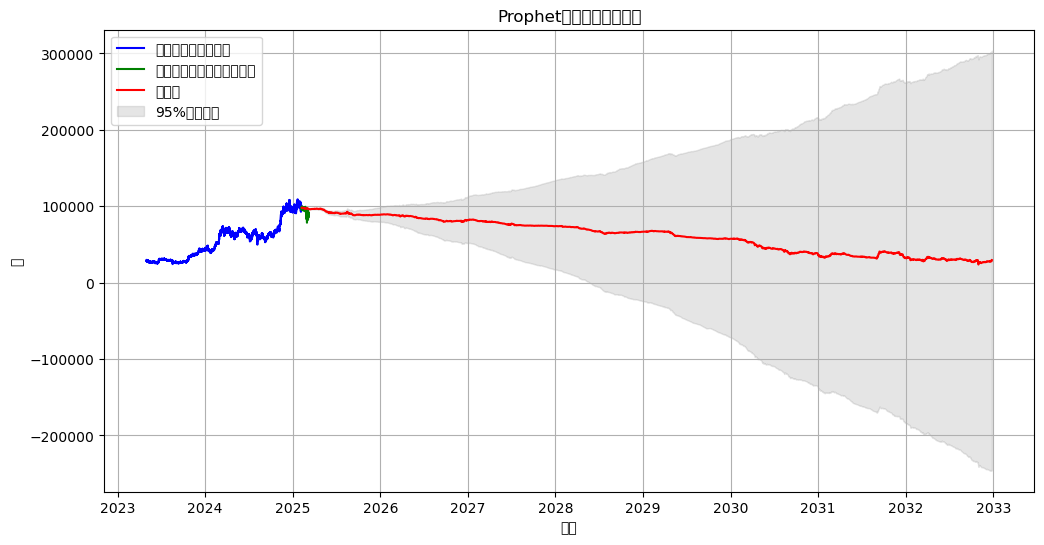

/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/envs/cyptocurrency/lib/python3.12/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime o

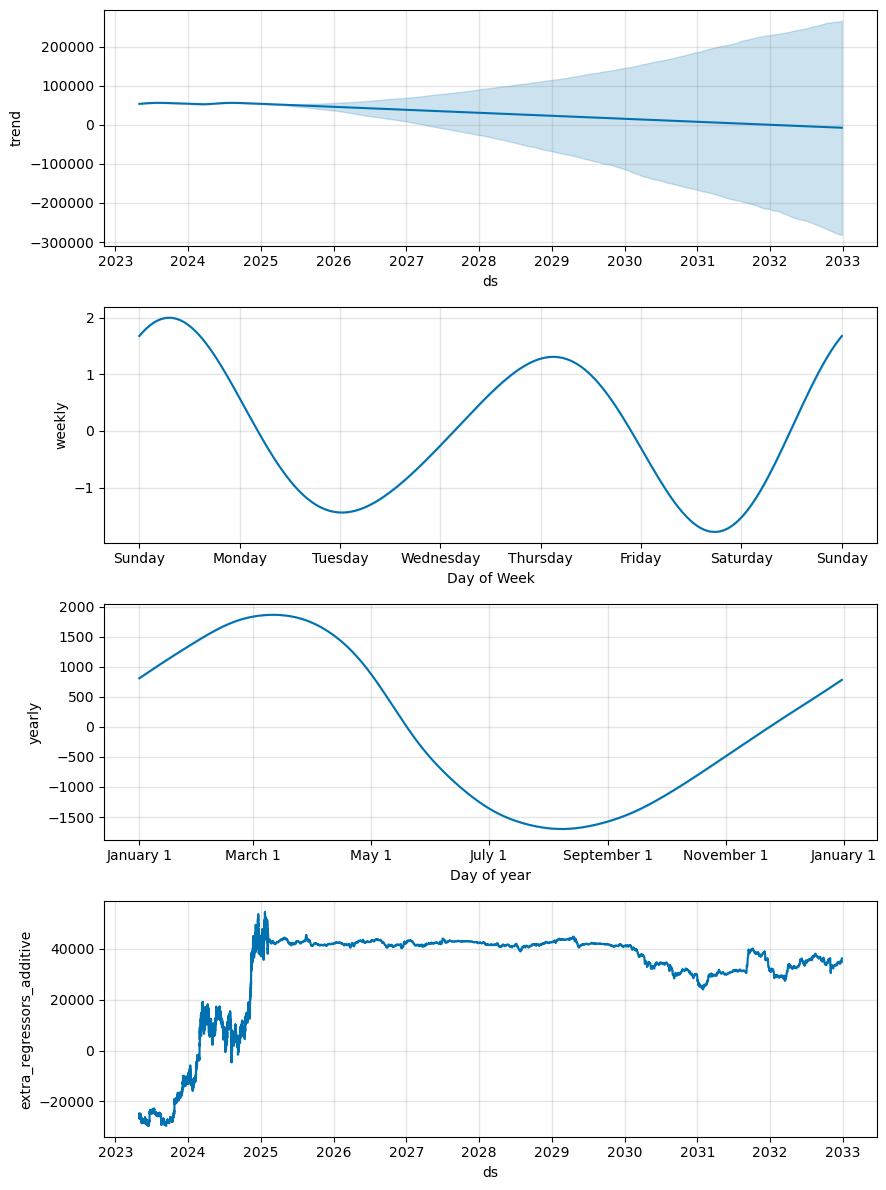

In [81]:

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# # 方法1: 列名を変更する場合
# df = df_multi.rename(columns={
#     'datetime': 'ds',
#     'close': 'y'
# })

# 特徴量の前処理を行う関数
def clean_numeric_columns(df, columns_to_clean=None):
    if columns_to_clean is None:
        # 数値に変換すべき列を自動検出（オブジェクト型の列）
        columns_to_clean = df.select_dtypes(include=['object']).columns
    
    for col in columns_to_clean:
        if col in df.columns:
            # カンマを削除して数値に変換
            try:
                df[col] = df[col].astype(str).str.replace(',', '').astype(float)
            except Exception as e:
                print(f"列 '{col}' の変換中にエラーが発生しました: {e}")
    
    return df

# データフレームをクリーニング
df = clean_numeric_columns(df_multi.rename(columns={'datetime': 'ds', 'close': 'y'}))

# 特徴量として使用する列を特定（ds と y を除く全ての列）
feature_columns = [col for col in df.columns if col not in ['ds', 'y','timestamp','date_key','hour_key','変化率 %']]
print(f"モデルに追加する特徴量: {feature_columns}")



# トレーニングデータとテストデータに分割（最後の30日をテストデータとする）
train = df[:-2880]
test = df[-2880:]

# Prophetモデルの作成と学習
model = Prophet(yearly_seasonality=True, 
                weekly_seasonality=True, 
                daily_seasonality=False)

# すべての特徴量をモデルに追加
for feature in feature_columns:
    print(f"特徴量 '{feature}' をモデルに追加")
    model.add_regressor(feature)

model.fit(train)

# 予測期間の設定（テストデータと同じ期間）
future = model.make_future_dataframe(periods=2880)

# future データフレームに特徴量を追加
for feature in feature_columns:
    # トレーニング期間の特徴量をコピー
    future.loc[future.index[:-2880], feature] = train[feature].values
    
    # テスト期間の特徴量をコピー
    # 注意: 実際の予測では、テスト期間の特徴量が利用可能かどうかに応じて調整が必要
    future.loc[future.index[-2880:], feature] = test[feature].values

# 予測の実行
forecast = model.predict(future)

# テスト期間の予測結果を抽出
forecast_test = forecast.iloc[-2880:][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
# 実際の値と予測値を結合
evaluation = pd.merge(test, forecast_test, on='ds')

# 予測精度の評価
mae = mean_absolute_error(evaluation['y'], evaluation['yhat'])
rmse = np.sqrt(mean_squared_error(evaluation['y'], evaluation['yhat']))
r2 = r2_score(evaluation['y'], evaluation['yhat'])
mape = np.mean(np.abs((evaluation['y'] - evaluation['yhat']) / evaluation['y'])) * 100

print(f'平均絶対誤差 (MAE): {mae:.2f}')
print(f'二乗平均平方根誤差 (RMSE): {rmse:.2f}')
print(f'決定係数 (R²): {r2:.2f}')
print(f'平均絶対パーセント誤差 (MAPE): {mape:.2f}%')

# 予測結果の可視化
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], 'b-', label='トレーニングデータ')
plt.plot(test['ds'], test['y'], 'g-', label='テストデータ（実際の値）')
plt.plot(forecast_test['ds'], forecast_test['yhat'], 'r-', label='予測値')
plt.fill_between(forecast_test['ds'], 
                 forecast_test['yhat_lower'], 
                 forecast_test['yhat_upper'], 
                 color='gray', alpha=0.2, label='95%信頼区間')
plt.legend()
plt.title('Prophetによる時系列予測')
plt.xlabel('日付')
plt.ylabel('値')
plt.grid(True)
plt.show()

# コンポーネントの可視化
model.plot_components(forecast)
plt.show()